### kNN基本知识
#### 基础概念
K最近邻(K-Nearest Neighbor,KNN)算法，是著名的模式识别统计学方法，在机器学习分类算法中占有相当大的地位。它是一个理论上比较成熟的方法。既是最简单的机器学习算法之一，也是基于实例的学习方法中最基本的，又是最好的文本分类算法之一。
如果一个实例在特征空间中的K个最相似（即特征空间中最近邻）的实例中的大多数属于某一个类别，则该实例也属于这个类别。所选择的邻居都是已经正确分类的实例。

#### 简单实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

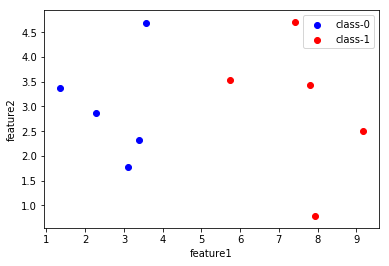

In [4]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color = 'b', label = 'class-0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color = 'r', label = 'class-1')
plt.legend()
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

预测数据x属于哪一类

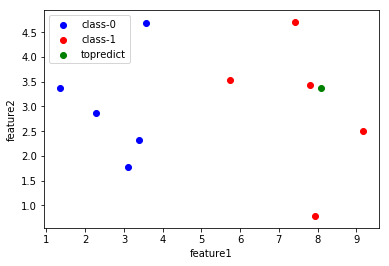

In [6]:
x = np.array([8.093607318, 3.365731514])
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color = 'b', label = 'class-0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color = 'r', label = 'class-1')
plt.scatter(x[0], x[1], color = 'g', label = 'topredict')
plt.legend()
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.show()

显然x应该更靠近红色，这里使用kNN算法思想进行预测

In [7]:
# 1.计算所有点到x的距离
# 2.取前k个点
# 3.获取k个点中从属类别最多的点，将其类别作为x的预测类别

In [10]:
distances = [np.sum((x_train - x) ** 2) for x_train in X_train]

In [11]:
distances

[23.1608002402217,
 27.34527338457421,
 45.5597865290622,
 22.077092061652028,
 34.04255885866877,
 2.220133979380214,
 5.5440229476146206,
 1.8936877250293382,
 0.09390057019346303,
 6.649611665663107]

In [13]:
k = 3
nearest = np.argsort(distances)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [15]:
topK_y = [y_train[i] for i in nearest[: k]]
topK_y

[1, 1, 1]

In [17]:
from collections import Counter
votes = Counter(topK_y)
votes

Counter({1: 3})

In [19]:
votes.most_common(1)

[(1, 3)]

In [20]:
predict_y = votes.most_common(1)[0][0]

In [21]:
predict_y

1